In [2]:
import os
import sys
from io import BytesIO
from pathlib import Path

import matplotlib.pyplot as plt
import msgpack
from PIL import Image
import numpy as np

In [3]:
data_path = Path("../data/raw/LDoGI/shards/")
data_path = data_path.resolve().absolute()
print(data_path)

/home/dkenez/Projects/Locus/locus-model/data/raw/LDoGI/shards


In [4]:
data_files = data_path.glob("*.msg")
first_file = next(data_files)

In [5]:
def format_size(size: int, uom: str="kb")-> str:
    assert uom in ["b", "kb", "Mb"]
    if uom == "b":
        return f"{size:.02f} b"
    elif uom == "kb":
        return f"{size / 1024:.02f} kb"
    elif uom == "Mb":
        return f"{size / 1024 / 1024:.02f} Mb"
    else:
        return f"{size:.02f} b"

In [6]:
msg_size = os.path.getsize(first_file)
print(format_size(msg_size, "Mb"))


691.42 Mb


In [7]:
# https://www.kaggle.com/code/jongkook90/inspect-the-dataset
# inspect the dataset code from kaggle
def get_image(record):
        return Image.open(BytesIO(record["image"]))

In [ ]:


from collections import Counter

c = Counter()
for data_file in data_files:
    with open(data_file.resolve().absolute(), "rb") as infile:
        # gene = msgpack.Unpacker(infile, raw=False)
        # print(type(gene))
        # print(format_size(sys.getsizeof(gene)))
        # print(gene)

        for i, record in enumerate(msgpack.Unpacker(infile, raw=False)):
            image = get_image(record)
            c[f"{image.size}"] += 1

        else:
            print(f"Total of {i} images in the {data_file.name} file")


# print(type(gene))
# print(format_size(sys.getsizeof(gene)))
# print(gene)

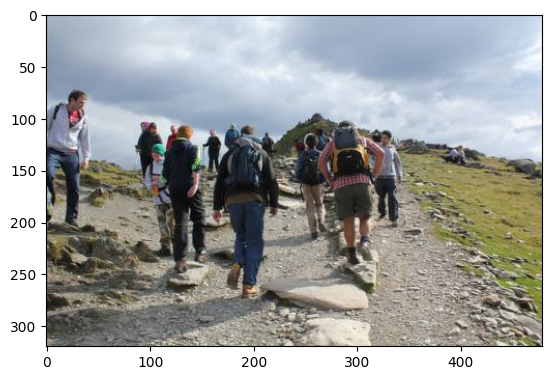

In [9]:
plt.imshow(image)
plt.show()

In [10]:
len(c.most_common())

8160

In [11]:
c.most_common(1)[0][0].replace("(", "").replace(")", "").split(", ")

['426', '320']

In [12]:
sizes = [ element[0].replace("(", "").replace(")", "").split(", ") for element in c.most_common()]

In [13]:
widths = set([int(size[0]) for size in sizes])
heights = set([int(size[1]) for size in sizes])

In [14]:
len(widths), len(heights)

(591, 626)

In [35]:
from functools import reduce

total = c.total()

counts = [el[1] for el in c.most_common()][:20]
r = reduce(lambda x, y: x + y, counts)
print(r*100/total)

80.58153605425056


In [30]:
c.total()

4203901

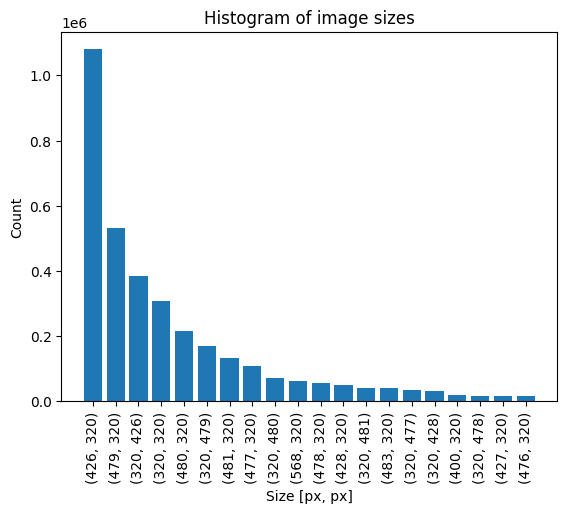

In [69]:
fig, ax = plt.subplots()

fruits = [el[0] for el in c.most_common()][:20]
counts = [el[1] for el in c.most_common()][:20]

ax.bar(fruits, counts)

ax.set_ylabel('Count')
ax.set_xlabel('Size [px, px]')
ax.set_title('Histogram of image sizes')
plt.xticks(rotation=90)
plt.savefig("size_hist.svg", bbox_inches='tight', transparent=True,
               pad_inches=0, format="svg")

plt.show()

In [44]:
w_counter = Counter()
h_counter = Counter()
for el in c.most_common():
    size = el[0].replace("(", "").replace(")", "").split(", ")
    w = int(size[0])
    h = int(size[1])
    w_counter[w] += el[1]
    h_counter[h] += el[1]

In [45]:
print(w_counter.total())
print(h_counter.total())

4203901
4203901


In [47]:
w_disp = sorted(w_counter.most_common(), key=lambda x: x[0])
h_disp = sorted(h_counter.most_common(), key=lambda x: x[0])

In [60]:
[el[0] for el in w_counter.most_common()][:20]

[320,
 426,
 479,
 480,
 481,
 477,
 568,
 478,
 428,
 640,
 483,
 639,
 400,
 427,
 476,
 482,
 424,
 425,
 484,
 567]

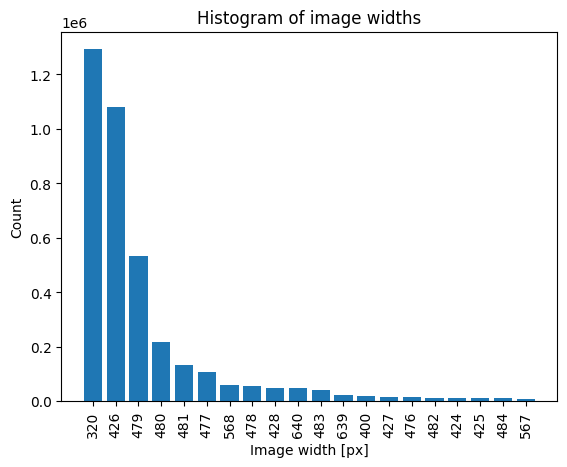

In [70]:
fig, ax = plt.subplots()

fruits = [str(el[0]) for el in w_counter.most_common()][:20]
counts = [el[1] for el in w_counter.most_common()][:20]

ax.bar(fruits, counts)

ax.set_ylabel('Count')
ax.set_xlabel('Image width [px]')
ax.set_title('Histogram of image widths')
plt.xticks(rotation=90)
plt.savefig("width_hist.svg", bbox_inches='tight', transparent=True,
               pad_inches=0, format="svg")

plt.show()

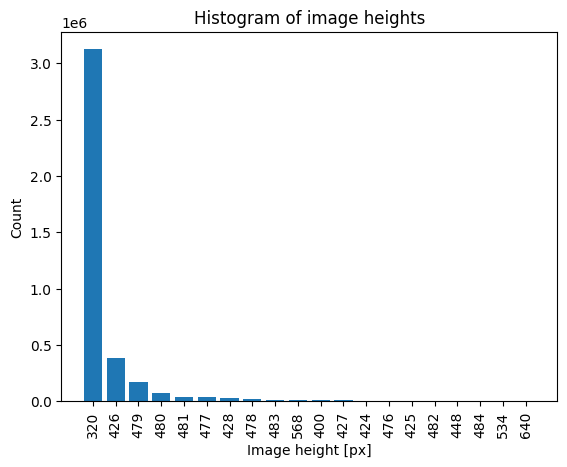

In [71]:
fig, ax = plt.subplots()

fruits = [str(el[0]) for el in h_counter.most_common()][:20]
counts = [el[1] for el in h_counter.most_common()][:20]

ax.bar(fruits, counts)

ax.set_ylabel('Count')
ax.set_xlabel('Image height [px]')
ax.set_title('Histogram of image heights')
plt.xticks(rotation=90)
plt.savefig("height_hist.svg", bbox_inches='tight', transparent=True,
               pad_inches=0, format="svg")
plt.show()